In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df = pd.read_csv("churn.csv")
#df = pd.read_csv("Churn_Modelling.csv") - It's another dataset which i used to train the models.

In [52]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [53]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Text(0.5, 1.0, 'Distribution of churn')

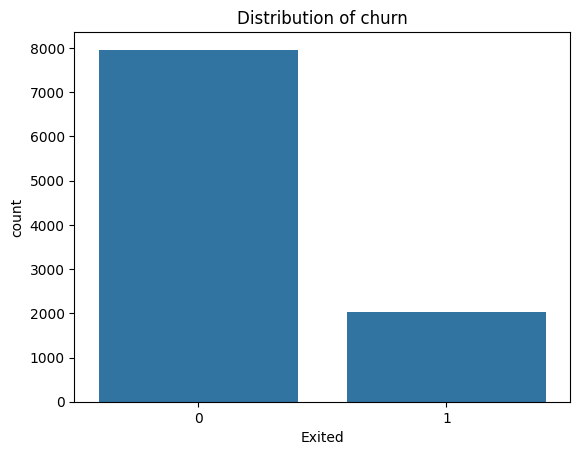

In [54]:
sns.countplot(x="Exited",data=df)
plt.title("Distribution of churn")

Text(0.5, 1.0, 'Age Distribution')

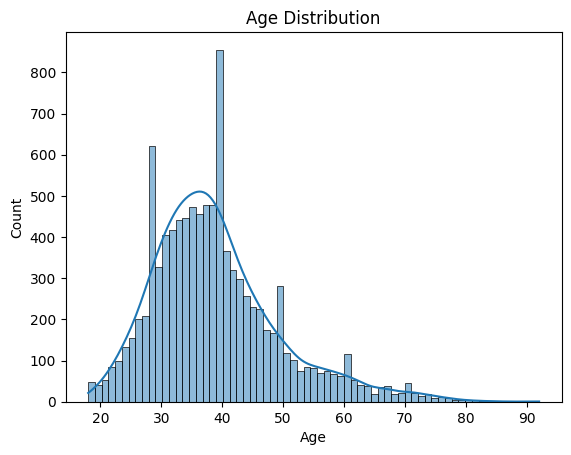

In [55]:
sns.histplot(data=df,x="Age",kde=True)
plt.title("Age Distribution")

Text(0.5, 1.0, 'Creditscore vs Age')

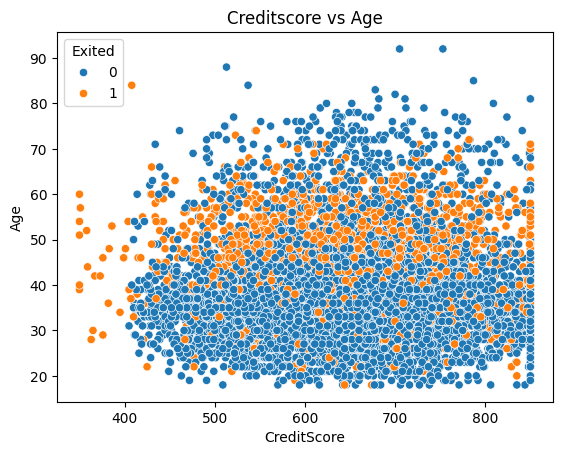

In [56]:
sns.scatterplot(data=df,x="CreditScore",y="Age",hue="Exited")
plt.title("Creditscore vs Age")

Text(0.5, 1.0, 'Balance Distribution by Churn')

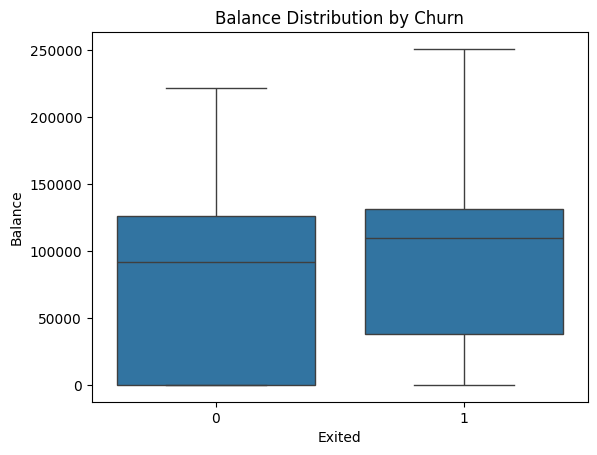

In [57]:
sns.boxplot(x="Exited", y ="Balance", data = df)#By this plot, we concluded that balance of churned customers is greater than unchurned customers by median in both 0 and 1.
plt.title("Balance Distribution by Churn")

Text(0.5, 1.0, 'Balance Distribution by Churn')

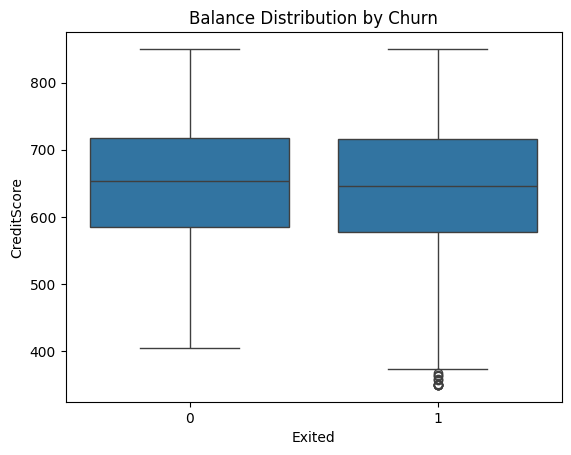

In [58]:
sns.boxplot(x="Exited", y ="CreditScore", data = df)#By this plot, we concluded that creditscores of unchurned customers is greater than churned customers by median in both 0 and 1.
plt.title("Balance Distribution by Churn")

In [59]:
#pre-process the dataset
df = df.dropna()#drop any missing values in the rows
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [60]:
features = df.drop("Exited",axis=1)
features

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [61]:
target = df['Exited']
target

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [62]:
features=features.drop(["RowNumber","CustomerId","Surname"],axis=1)
features

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [63]:
features = features.dropna()#drop any missing values in the rows
features

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [64]:
target = target.dropna()#drop any missing values in the rows
target

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [65]:
features = pd.get_dummies(features,columns=["Geography","Gender"])
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True


In [66]:
from sklearn.model_selection import train_test_split #splitting the data
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [67]:
X_train,X_test,Y_train,Y_test = train_test_split(features,target,test_size=0.2,random_state=42)

In [68]:
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
6252,596,32,3,96709.07,2,0,0,41788.37,False,True,False,False,True
4684,623,43,1,0.00,2,1,1,146379.30,True,False,False,False,True
1731,601,44,4,0.00,2,1,0,58561.31,False,False,True,True,False
4742,506,59,8,119152.10,2,1,1,170679.74,False,True,False,False,True
4521,560,27,7,124995.98,1,1,1,114669.79,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6412,602,53,5,98268.84,1,0,1,45038.29,False,True,False,True,False
8285,609,25,10,0.00,1,0,1,109895.16,True,False,False,False,True
7853,730,47,7,0.00,1,1,0,33373.26,True,False,False,True,False
1095,692,29,4,0.00,1,1,0,76755.99,True,False,False,False,True


In [69]:
scalar = StandardScaler() # To do the larger values better for the model while training
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Ensure both train and test sets have the same columns after encoding
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

In [70]:
X_train[0]

array([ 0.35649971, -0.6557859 ,  0.34567966, -1.21847056,  0.80843615,
        0.64920267,  0.97481699,  1.36766974,  1.00150113, -0.57946723,
       -0.57638802, -0.91324755,  0.91324755])

In [71]:
#start from the logisticregression model inorder to train the data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

import pickle

#import xgboost as XGB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier # RandomForest
from sklearn.tree import DecisionTreeClassifier # DecisionTree model
from sklearn.svm import SVC # Support Vector machine model
from sklearn.naive_bayes import GaussianNB # Naive Bayes model
from sklearn.neighbors import KNeighborsClassifier # K Nearest Neighbors model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

In [72]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train,Y_train)

LogisticRegression(random_state=42)

In [73]:
lr_predictions = lr_model.predict(X_test)
lr_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [74]:
lr_accuracy = accuracy_score(Y_test,lr_predictions)
lr_accuracy

0.811

In [75]:
#Try accuracy with other models
#create a function which fits for every model
def evaluate_and_save_model(model,X_train,X_test,Y_train,Y_test,filename):
  model.fit(X_train,Y_train)
  Y_pred = model.predict(X_test)
  accuracy = accuracy_score(Y_test,Y_pred)
  print(f"{model.__class__.__name__} Accuracy : {accuracy:.4f}")
  print(f"\nclassification report:\n {classification_report(Y_test,Y_pred)}")
  print("------------------------")

  with open(filename , "wb") as file:
    pickle.dump(model,file) # dump the model data

  print(f"model saved as {filename}")

In [76]:
#Calling the function by passing the model and the training dataset as parameters
xgb_model = XGBClassifier(random_state = 42)
evaluate_and_save_model(xgb_model,X_train,X_test,Y_train,Y_test,"xgb_model.pkl")

rf_model = RandomForestClassifier(random_state = 42)
evaluate_and_save_model(rf_model,X_train,X_test,Y_train,Y_test,"rf_model.pkl")

dt_model = DecisionTreeClassifier(random_state = 42)
evaluate_and_save_model(dt_model,X_train,X_test,Y_train,Y_test,"dt_model.pkl")

svm_model = SVC(random_state = 42)
evaluate_and_save_model(svm_model,X_train,X_test,Y_train,Y_test,"svm_model.pkl")

nb_model = GaussianNB()
evaluate_and_save_model(nb_model,X_train,X_test,Y_train,Y_test,"nb_model.pkl")

k_neighbors_model = KNeighborsClassifier()
evaluate_and_save_model(k_neighbors_model,X_train,X_test,Y_train,Y_test,"k_neighbors_model.pkl")

gb_model = GradientBoostingClassifier(random_state = 42)
evaluate_and_save_model(gb_model,X_train,X_test,Y_train,Y_test,"gb_model.pkl")

# Define base estimators - models in the stack
estimators = [
    ('decision_tree', DecisionTreeClassifier(random_state=42)),
    ('gradient_boosting', GradientBoostingClassifier(random_state=42)),
]

final_estimator = make_pipeline(StandardScaler(), LogisticRegression(max_iter=500, random_state=42))

sc_model = StackingClassifier(estimators=estimators,
    final_estimator=final_estimator,
    passthrough=True)
evaluate_and_save_model(sc_model,X_train,X_test,Y_train,Y_test,"sc_model.pkl")




XGBClassifier Accuracy : 0.7455

classification report:
               precision    recall  f1-score   support

           0       0.88      0.80      0.83      1607
           1       0.39      0.54      0.45       393

    accuracy                           0.75      2000
   macro avg       0.63      0.67      0.64      2000
weighted avg       0.78      0.75      0.76      2000

------------------------
model saved as xgb_model.pkl
RandomForestClassifier Accuracy : 0.8645

classification report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.46      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000

------------------------
model saved as rf_model.pkl
DecisionTreeClassifier Accuracy : 0.7850

classification report:
               precision    recall  f1-score   supp

In these models ,RandomForestClassifier model gave us more accuracy of 86% but XGBClassifier gave more recall percentage of 54 .

In [77]:
#After training models , we need to figure out which features are more important in predicting output.
feature_importances = xgb_model.feature_importances_
feature_names = features.columns

In [78]:
print(f"Length of feature_names: {len(feature_names)}")
print(f"Length of feature_importances: {len(feature_importances)}")
min_len = min(len(feature_names), len(feature_importances))
feature_importances = feature_importances[:min_len]
feature_names = feature_names[:min_len]
feature_importances

Length of feature_names: 13
Length of feature_importances: 13


array([0.03500515, 0.10955004, 0.03005428, 0.05278617, 0.32388842,
       0.03194036, 0.16414644, 0.03265523, 0.04646328, 0.09137332,
       0.0368547 , 0.04528258, 0.        ], dtype=float32)

In [79]:
feature_names

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [80]:
feature_importances_df = pd.DataFrame({
    'feature' : feature_names,
    'importance' : feature_importances
})

In [81]:
feature_importances_df

,feature,importance
0,CreditScore,0.035005
1,Age,0.109550
2,Tenure,0.030054
3,Balance,0.052786
4,NumOfProducts,0.323888
5,HasCrCard,0.031940
6,IsActiveMember,0.164146
7,EstimatedSalary,0.032655
8,Geography_France,0.046463
9,Geography_Germany,0.091373


In [82]:
feature_importances_df = feature_importances_df.sort_values('importance',ascending = False)

In [83]:
feature_importances_df

,feature,importance
4,NumOfProducts,0.323888
6,IsActiveMember,0.164146
1,Age,0.109550
9,Geography_Germany,0.091373
3,Balance,0.052786
8,Geography_France,0.046463
11,Gender_Female,0.045283
10,Geography_Spain,0.036855
0,CreditScore,0.035005
7,EstimatedSalary,0.032655


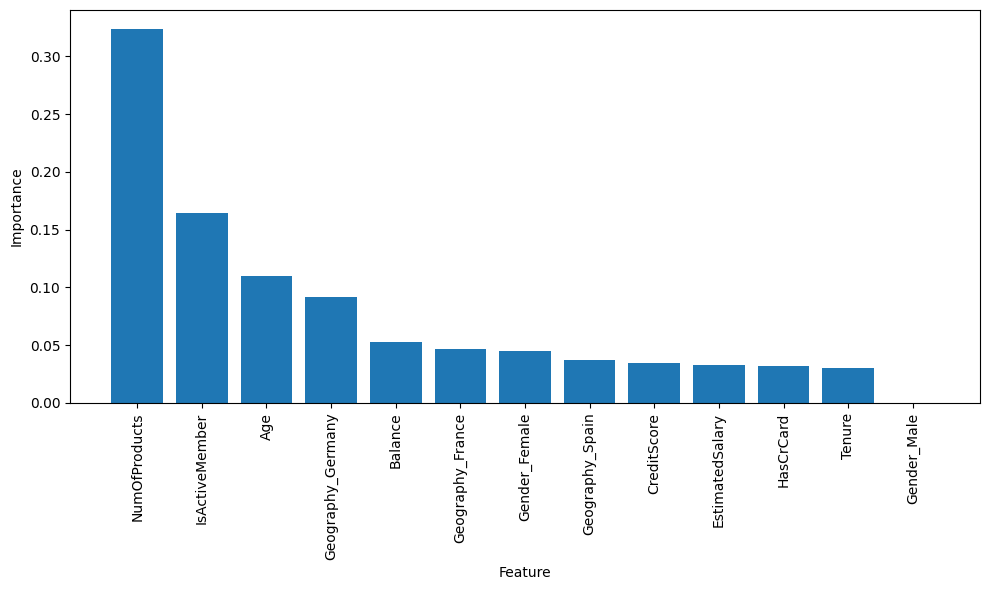

In [84]:
#Visualize using bar chart
plt.figure(figsize=(10,6))
plt.bar(feature_importances_df['feature'],feature_importances_df['importance'])
plt.xticks(rotation = 90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()


In [85]:
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True


In [86]:
#create new features - feature engineering
features['CLV'] = df['Balance']*df['EstimatedSalary']/100000  #CLV- Customer Lifetime value
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CLV
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False,0.000000
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False,94319.527887
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False,181904.056115
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False,0.000000
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False,99259.102400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True,0.000000
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True,58344.761420
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False,0.000000
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True,69736.344344


In [87]:
features['AgeGroup'] = pd.cut(df['Age'],bins = [0,30,45,60,100],labels = ['Younger','Middle_Age','Senior','Elderly'])
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CLV,AgeGroup
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False,0.000000,Middle_Age
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False,94319.527887,Middle_Age
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False,181904.056115,Middle_Age
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False,0.000000,Middle_Age
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False,99259.102400,Middle_Age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True,0.000000,Middle_Age
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True,58344.761420,Middle_Age
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False,0.000000,Middle_Age
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True,69736.344344,Middle_Age


In [88]:
features['TenureAgeRation'] = df['Tenure'] / df['Age']
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CLV,AgeGroup,TenureAgeRation
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False,0.000000,Middle_Age,0.047619
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False,94319.527887,Middle_Age,0.024390
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False,181904.056115,Middle_Age,0.190476
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False,0.000000,Middle_Age,0.025641
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False,99259.102400,Middle_Age,0.046512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True,0.000000,Middle_Age,0.128205
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True,58344.761420,Middle_Age,0.285714
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False,0.000000,Middle_Age,0.194444
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True,69736.344344,Middle_Age,0.071429


In [89]:
features = pd.get_dummies(features,drop_first= True)  # drop_first = True is used to avoid multicollinearity
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CLV,TenureAgeRation,AgeGroup_Middle_Age,AgeGroup_Senior,AgeGroup_Elderly
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False,0.000000,0.047619,True,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False,94319.527887,0.024390,True,False,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False,181904.056115,0.190476,True,False,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False,0.000000,0.025641,True,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False,99259.102400,0.046512,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True,0.000000,0.128205,True,False,False
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True,58344.761420,0.285714,True,False,False
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False,0.000000,0.194444,True,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True,69736.344344,0.071429,True,False,False


Until now, We have created new features from the existed old one's. Next thing is to split the data and train as usual.

In [90]:
X_train,X_test,Y_train,Y_test = train_test_split(features,target,test_size=0.2,random_state=42)


In [91]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CLV,TenureAgeRation,AgeGroup_Middle_Age,AgeGroup_Senior,AgeGroup_Elderly
9254,686,32,6,0.00,2,1,1,179093.26,True,False,False,False,True,0.000000,0.187500,True,False,False
1561,632,42,4,119624.60,2,1,1,195978.86,False,True,False,False,True,234438.927360,0.095238,True,False,False
1670,559,24,3,114739.92,1,1,0,85891.02,False,False,True,False,True,98551.287635,0.125000,False,False,False
6087,561,27,9,135637.00,1,1,0,153080.40,True,False,False,True,False,207633.662148,0.333333,False,False,False
6669,517,56,9,142147.32,1,0,0,39488.04,True,False,False,False,True,56131.190581,0.160714,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,768,54,8,69712.74,1,1,1,69381.05,True,False,False,False,True,48367.430996,0.148148,False,True,False
5191,682,58,1,0.00,1,1,1,706.50,True,False,False,True,False,0.000000,0.017241,False,True,False
5390,735,38,1,0.00,3,0,0,92220.12,True,False,False,True,False,0.000000,0.026316,True,False,False
860,667,43,8,190227.46,1,1,0,97508.04,True,False,False,False,True,185487.067788,0.186047,True,False,False


In [92]:
xgboost_model = XGBClassifier(random_state = 42)
evaluate_and_save_model(xgb_model,X_train,X_test,Y_train,Y_test,"xgboost_feature_engineering_model.pkl")

XGBClassifier Accuracy : 0.8540

classification report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91      1607
           1       0.67      0.50      0.58       393

    accuracy                           0.85      2000
   macro avg       0.78      0.72      0.74      2000
weighted avg       0.84      0.85      0.85      2000

------------------------
model saved as xgboost_feature_engineering_model.pkl


By this feature_Engineering technique,accuracy increased from 74% to 85%.

In [93]:
#Next techniques is SMOTE - Synthetic Minority Oversampling Technique
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

In [94]:
#We fit this smote model to our training data to create new synthetic data for minority class
X_resampled,Y_resampled = smote.fit_resample(X_train,Y_train)

In [95]:
evaluate_and_save_model(xgboost_model,X_resampled,X_test,Y_resampled,Y_test,"xgboost_smote_model.pkl")

XGBClassifier Accuracy : 0.8545

classification report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      1607
           1       0.65      0.55      0.60       393

    accuracy                           0.85      2000
   macro avg       0.77      0.74      0.75      2000
weighted avg       0.85      0.85      0.85      2000

------------------------
model saved as xgboost_smote_model.pkl


we got recall for class 1 increased from 50% to 55%.
Next technique is Ensembling.

In [96]:
#we import "votingClassifier" from sklearn .It's a ML model that combines the predictions of multiple models together.
from sklearn.ensemble import VotingClassifier

In [97]:
#estimators expects a list of tuples, where each tuple contains a name and the corresponding classifier instance.
voting_clf = VotingClassifier(
    estimators = [('xgboost',XGBClassifier(random_state = 42)),('rf',RandomForestClassifier(random_state = 42)),('dt',DecisionTreeClassifier(random_state = 42)),('SVM',SVC(random_state = 42,probability = True))],
    voting = 'hard'
)

In [98]:
evaluate_and_save_model(voting_clf,X_resampled,X_test,Y_resampled,Y_test,"voting_clf.pkl")

VotingClassifier Accuracy : 0.8590

classification report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91      1607
           1       0.68      0.53      0.60       393

    accuracy                           0.86      2000
   macro avg       0.79      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000

------------------------
model saved as voting_clf.pkl


In [102]:
from google.colab import files

model_filenames = [
    "xgb_model.pkl",
    "rf_model.pkl",
"dt_model.pkl",
"k_neighbors_model.pkl",
"nb_model.pkl",
"svm_model.pkl",
"voting_clf.pkl",
"xgboost_feature_engineering_model.pkl",
"xgboost_smote_model.pkl",
"gb_model.pkl",
"sc_model.pkl"
]

for filename in model_filenames:
    files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [103]:
%%writefile streamlit_app.py
import streamlit as st
import pandas as pd
import pickle
import numpy as np
import os
from openai import OpenAI
import utils as ut

client = OpenAI(
    base_url="https://api.groq.com/openai/v1",
    api_key=os.environ['GROQ_API_KEY'],
)


#define a function to load the trained models
def load_model(filename):
  with open(filename, "rb") as file:
    return pickle.load(file)


xgboost_model = load_model("xgb_model.pkl")
randomforest_model = load_model("rf_model.pkl")
decisiontree_model = load_model("dt_model.pkl")
kneightbors_model = load_model("k_neighbors_model.pkl")
nb_model = load_model("nb_model.pkl")
SVM_model = load_model("svm_model.pkl")
voting_clf_model = load_model("voting_clf.pkl")
xgboostFeaturEngineering_model = load_model(
    "xgboost_feature_engineering_model.pkl")
xgboostSmote_model = load_model("xgboost_smote_model.pkl")
gb_model = load_model("gb_model.pkl")
sc_model = load_model("sc_model.pkl")


def prepare_input(credit_score, location, gender, age, tenure, balance,
                  num_of_products, has_credit_card, is_active_member,
                  estimated_salary):

  input_dict = {
      "CreditScore": credit_score,
      "Age": age,
      "Tenure": tenure,
      "Balance": balance,
      "NumOfProducts": num_of_products,
      "HasCrCard": int(has_credit_card),
      "IsActiveMember": int(is_active_member),
      "EstimatedSalary": estimated_salary,
      "Geography_France": 1 if location == "France" else 0,
      "Geography_Germany": 1 if location == "Germany" else 0,
      "Geography_Spain": 1 if location == "Spain" else 0,
      "Gender_Male": 1 if gender == "Male" else 0,
      "Gender_Female": 1 if gender == "Female" else 0
  }
  input_df = pd.DataFrame([input_dict])
  return input_df, input_dict


def make_predictions(input_df, input_dict):

  probabilites = {
      "xgboost": xgboost_model.predict_proba(input_df)[0][1],
      "randomforest": randomforest_model.predict_proba(input_df)[0][1],
      "kneightbors": kneightbors_model.predict_proba(input_df)[0][1],
      # "decisiontree":
      # decisiontree_model.predict_proba(input_df)[0][1],
      # "nb":
      # nb_model.predict_proba(input_df)[0][1],
      # # "SVC":
      # # SVM_model.predict_proba(input_df)[0][1],
      # "voting_clf":
      # voting_clf_model.predict_proba(input_df)[0][1],
      # "xgboostFeaturEngineering":
      # xgboostFeaturEngineering_model.predict_proba(input_df)[0][1],
      # "xgboostSmote":
      # xgboostSmote_model.predict_proba(input_df)[0][1]
  }

  average_probability = np.mean(list(probabilites.values()))

  col1, col2 = st.columns(2)

  with col1:
    fig = ut.create_gauge_chart(average_probability)
    st.plotly_chart(fig, use_container_width=True)
    st.write(
        f"The customer has a {average_probability:.2%} probability of churning."
    )

  with col2:
    fig_probs = ut.create_model_probability_chart(probabilites)
    st.plotly_chart(fig_probs, use_container_width=True)

  st.markdown("### Model Probabilties")
  for model, prob in probabilites.items():
    st.write(f"{model} : {prob}")
  st.write(f"Average_Probability: {average_probability}")

  return average_probability


def explain_prediction(probability, input_dict, surname):
  prompt = f""" You are an expert data scientist at HS bank, where you specialize in interpreting and explaining predictions of machine learning models.

    Your machine learning model has predicted that a customer named {surname} has a {round(probability * 100,1)}% probability of churning based on the information provided below.

    Here's the customer's infromation:
    {input_dict}



    Here are the machine learning model's top 10 most important features fro predicting churn:

        Feature	          | Importance
       ----------------	  | ---------------
        NumOfProducts	  | 0.323888
        IsActiveMember	  | 0.164146
        Age	              | 0.109550
        Geography_Germany |	0.091373
        Balance           |	0.052786
        Geography_France  |	0.046463
        Gender_Female	  | 0.045283
        Geography_Spain	  | 0.036855
        CreditScore	      | 0.035005
        EstimatedSalary	  | 0.032655
        HasCrCard	      | 0.031940
        Tenure	          | 0.030054
        Gender_Male	      | 0.000000

    {pd.set_option('display.max_columns',None)}

    Here are the summary statistics for churned customers:
    {df[df['Exited'] == 1].describe()}

    Here are the summary statistics for non-churned customers:
    {df[df['Exited'] == 0].describe()}

    -If the customer has over a 40% risk of churning,generate a three senetnce detailed explanation of why they are at risk of churning.

    -If the customer has less than a 40% risk of churning,generate a three senetnce detailed explanation of why they might not be at risk of churning.

    -your explanation should be based on the customer's infromation, the summary statiustics of churned and non-churned customers and feature importances provided.

    Important information including any headings in the explanation should be decorated in bold .

    -Don't mention the probability of churning or machine learning model or say anything like "Based on the machine learning model's prediction and top 10 most important features",just explain the prediction.
    """
  print("Explanation Prompt:", prompt)

  raw_response = client.chat.completions.create(model="llama-3.2-3b-preview",
                                                messages=[{
                                                    "role": "user",
                                                    "content": prompt
                                                }])
  return raw_response.choices[0].message.content


def generate_email(probability, input_dict, explanation, surname):
  prompt = f""" You are a manager at HS bank. You are responsible for ensuring customer's stay with the bank and are incentivized with varios offers.

    Your noticed a customer named {surname} has a {round(probability * 100,1)}% probability of churning.

    Here's the customer's infromation:
    {input_dict}



    Here is some explanation as to why the customer might be at risk of churning:

        {explanation}

    Generate an email to the customer based on the their information,asking them to stay if they are at risk of churning or offering them incentives so that they become more loyal to the bank.

    Important information in the email should be decorated in bold .

    Make sure to list out a set of incentives for the respective customer to stay with the bank based on their information in bullet point format.

    Each bullet point need to be seperated .

    Don't ever mention the probability of churning or machine learning models to the customer.
    """

  raw_response = client.chat.completions.create(model="llama-3.2-3b-preview",
                                                messages=[{
                                                    "role": "user",
                                                    "content": prompt
                                                }])

  print("\n\nEmail Prompt:", prompt)

  return raw_response.choices[0].message.content


st.title("Customer Churn Prediction")
df = pd.read_csv("churn.csv")

customers = [
    f"{row['CustomerId']}-{row['Surname']}" for _, row in df.iterrows()
]

selected_customer_option = st.selectbox("Select a customer", customers)

if selected_customer_option:
  selected_customer_id = int(selected_customer_option.split("-")[0])

  print("seleted customer id", selected_customer_id)

  selected_customer_surname = selected_customer_option.split("-")[1]

  print("seleted customer surname", selected_customer_surname)

  selected_customer = df.loc[df["CustomerId"] == selected_customer_id].iloc[0]

  print("selected customer", selected_customer)

  col1, col2 = st.columns(2)
  with col1:
    credit_score = st.number_input("Credit Score",
                                   min_value=300,
                                   max_value=850,
                                   value=int(selected_customer["CreditScore"]))

    location = st.selectbox("location", ["Spain", "France", "Germany"],
                            index=["Spain", "France", "Germany"
                                   ].index(selected_customer["Geography"]))

    gender = st.radio("Gender", ["Male", "Female"],
                      index=0 if selected_customer["Gender"] == "Male" else 1)

    age = st.number_input("Age",
                          min_value=18,
                          max_value=100,
                          value=int(selected_customer["Age"]))

    tenure = st.number_input("Tenure (years)",
                             min_value=0,
                             max_value=50,
                             value=int(selected_customer["Tenure"]))
    with col2:

      balance = st.number_input("Balance",
                                min_value=0.0,
                                value=float(selected_customer["Balance"]))

      num_of_products = st.number_input(
          "Number Of Products",
          min_value=1,
          max_value=10,
          value=int(selected_customer["NumOfProducts"]))

      has_credit_card = st.checkbox("Has Credit Card",
                                    value=bool(selected_customer["HasCrCard"]))
      is_active_member = st.checkbox("Is Active Member",
                                     value=bool(
                                         selected_customer["IsActiveMember"]))

      estimated_salary = st.number_input(
          "Estimated_Salary",
          min_value=0.0,
          value=float(selected_customer["EstimatedSalary"]))
  input_df, input_dict = prepare_input(credit_score, location, gender, age,
                                       tenure, balance, num_of_products,
                                       has_credit_card, is_active_member,
                                       estimated_salary)
  average_probability = make_predictions(input_df, input_dict)

  explanation = explain_prediction(average_probability, input_dict,
                                   selected_customer['Surname'])

  st.markdown("---------")
  st.subheader("Explanation of Prediction:")
  st.markdown(explanation)
  email = generate_email(average_probability, input_dict, explanation,
                         selected_customer['Surname'])

  st.markdown("---------")
  st.subheader("Personalized Email:")
  st.markdown(email)


Writing streamlit_app.py


In [105]:
%%writefile utils.py
import plotly.graph_objects as go


def create_gauge_chart(probability):
    #it represents the chart with colors based on the probability
    if probability < 0.3:
        color = "green"
    elif probability < 0.6:
        color = "yellow"
    else:
        color = "red"

    fig = go.Figure(
        go.Indicator(mode="gauge+number",
                     value=probability * 100,
                     domain={
                         'x': [0, 1],
                         'y': [0, 1]
                     },
                     title={
                         'text': "Churn Probability",
                         'font': {
                             'size': 24,
                             'color': 'black'
                         }
                     },
                     number={'font': {
                         'size': 40,
                         'color': 'black'
                     }},
                     gauge={
                         'axis': {
                             'range': [0, 100],
                             'tickwidth': 1,
                             'tickcolor': 'black',
                             'tickfont': {
                                 'size': 16,
                                 'color': 'black'
                             }
                         },
                         'bar': {
                             'color': color
                         },
                         'bgcolor':
                         "rgba(0,0,0,0)",
                         'borderwidth':
                         2,
                         'bordercolor':
                         'black',
                         'steps': [{
                             'range': [0, 30],
                             'color': "rgba(0,255,0,0.3)"
                         }, {
                             'range': [30, 60],
                             'color': "rgba(255,255,0,0.3)"
                         }, {
                             'range': [60, 100],
                             'color': "rgba(255,0,0,0.3)"
                         }],
                         'threshold': {
                             'line': {
                                 'color': 'black',
                                 'width': 4
                             },
                             'thickness': 0.75,
                             'value': 100
                         }
                     }))

    # Update chart layout
    fig.update_layout(paper_bgcolor="rgba(0,0,0,0)",
                      plot_bgcolor="rgba(0,0,0,0)",
                      font={'color': "white"},
                      width=400,
                      height=300,
                      margin=dict(l=20, r=40, t=50, b=20))
    return fig


def create_model_probability_chart(probabilities):
    models = list(probabilities.keys())
    probs = list(probabilities.values())

    fig = go.Figure(data=[
        go.Bar(y=models,
               x=probs,
               orientation='h',
               text=[f'{p:.2%}' for p in probs],
               textposition='auto')
    ])

    # Update chart layout
    fig.update_layout(title="Churn Probability By Model",
                      yaxis_title="Models",
                      xaxis_title="Probability",
                      xaxis=dict(tickformat='.0%', range=[0, 1]),
                      height=400,
                      margin=dict(l=20, r=20, t=40, b=20))
    return fig


Overwriting utils.py


In [108]:
%%writefile requirements.txt
streamlit
pandas
numpy
scikit-learn
plotly
openai
imbalanced-learn
xgboost

Writing requirements.txt


In [109]:
from google.colab import files

files.download('streamlit_app.py')
files.download('utils.py')
files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>